<a href="https://colab.research.google.com/github/Akeerthipriya/BrainCraft/blob/master/movie_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recommender systems are no joke. They have found enterprise application a long time ago by helping all the top players in the online market place. Amazon, Netflix, Google and many others have been using the technology to curate content and products for its customers. Amazon recommends products based on your purchase history, user ratings of the product etc. Netflix recommends movies and TV shows all made possible by highly efficient recommender systems.

# MovieLens Dataset
It is one of the first go-to datasets for building a simple recommender system. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Building A Simple Movie Recommender
 **Loading the data** 

In [ ]:
users = pd.read_csv('/content/u.user',sep='|',names=['user_id','age','gender','occupation','zip_code'])
ratings = pd.read_csv('/content/u.data',sep='\t',names=['user_id','item_id','rating','timestamp'])
movies = pd.read_csv('/content/u.item',sep='|',names=['movie_id','movie_title','release_date','video_release_date','IMDB URL','unknown','Action','Adeventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-noir','Horror','Musical','Mystery','Romance','Sci-fi','Thriller','War','Western'],encoding='latin=1',header=None)
movies=movies.iloc[:,[0,1]]

In [ ]:
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


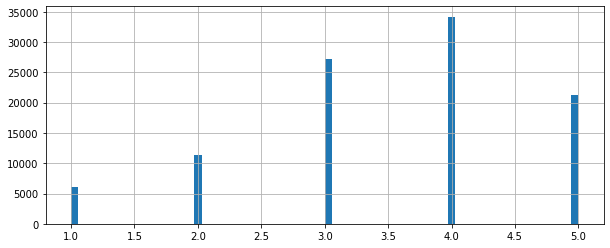

In [ ]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
ratings['rating'].hist(bins = 70) 

In [ ]:
movies.head(100)

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
95,96,Terminator 2: Judgment Day (1991)
96,97,Dances with Wolves (1990)
97,98,"Silence of the Lambs, The (1991)"
98,99,Snow White and the Seven Dwarfs (1937)


In [ ]:
users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [ ]:
merge1=pd.merge(movies,ratings,right_on='item_id',left_on='movie_id')
merge1.head(100)

,movie_id,movie_title,user_id,item_id,rating,timestamp
0,1,Toy Story (1995),308,1,4,887736532
1,1,Toy Story (1995),287,1,5,875334088
2,1,Toy Story (1995),148,1,4,877019411
3,1,Toy Story (1995),280,1,4,891700426
4,1,Toy Story (1995),66,1,3,883601324
...,...,...,...,...,...,...
95,1,Toy Story (1995),2,1,4,888550871
96,1,Toy Story (1995),62,1,2,879372813
97,1,Toy Story (1995),343,1,5,876402668
98,1,Toy Story (1995),298,1,5,884126061


In [ ]:
ratings.sort_values('rating', ascending = False).head(10) 


,user_id,item_id,rating,timestamp
28336,64,183,5,889737914
16000,213,121,5,878870940
28426,286,707,5,877531975
38655,94,518,5,891720950
16022,108,10,5,879879834
16021,331,81,5,877196702
38654,363,172,5,891495711
91519,617,192,5,883788900
46578,694,199,5,875728435
84851,801,332,5,890332719


In [ ]:
merge1.tail(100)



,movie_id,movie_title,user_id,item_id,rating,timestamp
99900,1618,King of New York (1990),528,1618,1,888521905
99901,1619,All Things Fair (1996),543,1619,3,874865635
99902,1620,"Sixth Man, The (1997)",552,1620,3,879222071
99903,1620,"Sixth Man, The (1997)",653,1620,2,886052291
99904,1620,"Sixth Man, The (1997)",550,1620,4,883425448
...,...,...,...,...,...,...
99995,1678,Mat' i syn (1997),863,1678,1,889289570
99996,1679,B. Monkey (1998),863,1679,3,889289491
99997,1680,Sliding Doors (1998),863,1680,2,889289570
99998,1681,You So Crazy (1994),896,1681,3,887160722


In [ ]:
merge1.mean()

movie_id     4.255301e+02
user_id      4.624848e+02
item_id      4.255301e+02
rating       3.529860e+00
timestamp    8.835289e+08
dtype: float64

# Feature Engineering
**Average Rating**
The dataset is a collection of ratings by a number of users for different movies. Let’s find out the average rating for each and every movie in the dataset.

In [ ]:
Average_ratings = pd.DataFrame(merge1.groupby('movie_title')['rating'].mean())
Average_ratings.head(10)

,rating
movie_title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


**Total Number Of Rating**

The rating of a movie is proportional to the total number of ratings it has. Therefore, we will also consider the total ratings cast for each movie.

In [ ]:
Average_ratings['Total Ratings'] = pd.DataFrame(merge1.groupby('movie_title')['rating'].count())
Average_ratings.head(10)

,rating,Total Ratings
movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


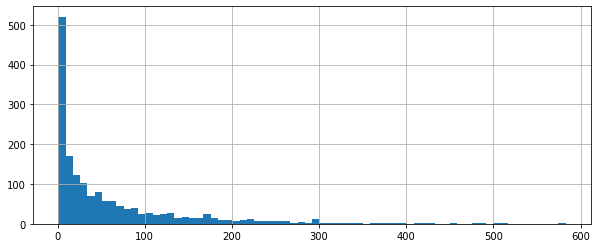

In [ ]:
# plot graph of 'Total ratings column' 
plt.figure(figsize =(10, 4)) 
  
Average_ratings['Total Ratings'].hist(bins = 70) 

**Let we plot a nice scatter plot of rating vs. a number of ratings**

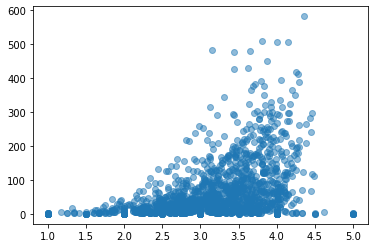

In [ ]:
plt.scatter( Average_ratings['rating'],Average_ratings['Total Ratings'], alpha=0.5)

*We can see a trend here — as a movie gets more ratings it’s average 
ratings tends to increase*

In [ ]:
finalDF=pd.merge(merge1,users,left_on='user_id',right_on='user_id')
finalDF.head(15)

,movie_id,movie_title,user_id,item_id,rating,timestamp,age,gender,occupation,zip_code
0,1,Toy Story (1995),308,1,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),308,4,5,887737890,60,M,retired,95076
2,5,Copycat (1995),308,5,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),308,7,4,887738847,60,M,retired,95076
4,8,Babe (1995),308,8,5,887736696,60,M,retired,95076
5,9,Dead Man Walking (1995),308,9,4,887737194,60,M,retired,95076
6,11,Seven (Se7en) (1995),308,11,5,887737837,60,M,retired,95076
7,12,"Usual Suspects, The (1995)",308,12,5,887737243,60,M,retired,95076
8,15,Mr. Holland's Opus (1995),308,15,3,887739426,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),308,17,4,887739056,60,M,retired,95076


In [ ]:
movies

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [ ]:
movies.describe()

,movie_id
count,1682.000000
mean,841.500000
std,485.695893
min,1.000000
25%,421.250000
50%,841.500000
75%,1261.750000
max,1682.000000


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [ ]:
ratings.sample(6)

,user_id,item_id,rating,timestamp
47792,310,50,5,879436177
20848,224,280,4,888104353
59116,658,1101,4,875147995
978,6,69,3,883601277
4930,198,568,3,884208710
52216,655,190,3,887427338


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [ ]:
users.sample(6)

,user_id,age,gender,occupation,zip_code
939,940,32,M,administrator,02215
757,758,27,M,student,53706
437,438,51,F,administrator,43204
841,842,40,M,writer,93055
938,939,26,F,student,33319
764,765,31,M,student,33066


In [ ]:
users[users.occupation.isnull()]

,user_id,age,gender,occupation,zip_code


In [ ]:
users.occupation.fillna(value=users.occupation.mode()[0], inplace=True)

In [ ]:
#Association matrix -pivot Table
#Pivot Table
learningMatrix=ratings.pivot_table(index=['item_id'],columns=['user_id'],values='rating').reset_index(drop=True)
learningMatrix.fillna(0,inplace=True)
learningMatrix.head(20)


user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,1.0,5.0,4.0,5.0,0.0,3.0,5.0,0.0,5.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,4.0,3.0,3.0,4.0,0.0,3.0,5.0,3.0,5.0,0.0,0.0,5.0,0.0,3.0,3.0,0.0,4.0,3.0,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,5.0,5.0,0.0,0.0,5.0,0.0,3.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,2.0,5.0,3.0,4.0,4.0,0.0,0.0,2.0,5.0,1.0,5.0,4.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,4.0,3.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,3.0,0.0,0.0,4.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,4.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
8,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,4.0,5.0,0.0,3.0,4.0,4.0,5.0,3.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,3.0,0.0,1.0,4.0,5.0,3.0,5.0,3.0,0.0,0.0,3.0
9,3.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Movie Similarity object model

In [ ]:
#apply cosine similarity formula on Association Matrix
from scipy.spatial.distance import cosine
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import hamming
from scipy.spatial.distance import minkowski

from sklearn.metrics import pairwise_distances
#Pairwise distance only accept Matrix object
movie_similarity=1-pairwise_distances(learningMatrix,metric="cosine")
np.fill_diagonal(movie_similarity,0)
ratings_matrix=pd.DataFrame(movie_similarity)
ratings_matrix.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,0.468291,0.460392,0.417509,0.347678,0.574377,0.224120,0.273916,0.046232,0.191772,0.232930,0.339196,0.527169,0.338105,0.467598,0.567950,0.227295,0.208472,0.592877,0.361657,0.150959,0.439441,0.259257,0.288536,0.090654,0.136757,0.108560,0.069805,0.368420,0.278386,0.246123,...,0.065390,0.010550,0.023592,0.014155,0.023592,0.023592,0.023592,0.023592,0.023592,0.014226,0.0,0.058979,0.047183,0.032856,0.035387,0.048189,0.058979,0.058979,0.035387,0.0,0.0,0.067404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033363,0.035387,0.000000,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,0.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,0.468506,0.459946,0.213972,0.125463,0.253162,0.098185,0.390438,0.113063,0.030692,0.091550,0.319308,0.483349,0.278182,0.434907,0.306639,0.206481,0.408737,0.483077,0.581119,0.089355,0.462797,0.160738,0.479187,0.072342,0.087347,0.215247,0.184592,0.562970,0.334570,0.256668,...,0.049324,0.035017,0.078299,0.046980,0.078299,0.078299,0.078299,0.078299,0.078299,0.000000,0.0,0.000000,0.078299,0.000000,0.104399,0.000000,0.000000,0.000000,0.104399,0.0,0.0,0.074571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055366,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,0.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,0.361165,0.319295,0.271402,0.190242,0.266335,0.167609,0.404239,0.126564,0.105377,0.187733,0.194546,0.293732,0.233814,0.381910,0.306447,0.214125,0.261303,0.269296,0.253074,0.126347,0.259129,0.185187,0.404930,0.179008,0.046315,0.073332,0.051270,0.240534,0.277311,0.176729,...,0.036615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009736,0.0,0.000000,0.096875,0.000000,0.000000,0.000000,0.064583,0.064583,0.096875,0.0,0.0,0.018452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
3,0.454938,0.502571,0.324866,0.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,0.588337,0.584884,0.397251,0.266764,0.330457,0.169240,0.404889,0.100856,0.129363,0.208262,0.256467,0.572811,0.446568,0.413422,0.422300,0.380248,0.370192,0.531380,0.429785,0.216894,0.480685,0.351676,0.467377,0.127933,0.062932,0.170815,0.143852,0.457528,0.456760,0.331256,...,0.023691,0.016819,0.037609,0.022565,0.037609,0.037609,0.037609,0.037609,0.037609,0.000000,0.0,0.000000,0.056413,0.069838,0.000000,0.000000,0.075218,0.075218,0.000000,0.0,0.0,0.064472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039890,0.000000,0.000000,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
4,0.286714,0.318836,0.212957,0.334239,0.000000,0.037299,0.334769,0.259161,0.272448,0.055453,0.375809,0.373824,0.196495,0.103288,0.265123,0.112156,0.389191,0.077737,0.088631,0.061197,0.192679,0.319438,0.245088,0.237436,0.284242,0.228855,0.242739,0.326892,0.321288,0.127992,0.338714,0.151706,0.280778,0.110782,0.041288,0.213947,0.058926,0.391974,0.287402,0.272573,...,0.039565,0.028088,0.062807,0.037684,0.062807,0.062807,0.062807,0.062807,0.062807,0.000000,0.0,0.000000,0.094211,0.000000,0.094211,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.053835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211
5,0.116344,0.083563,0.106722,0.090308,0.037299,0.000000,0.139617,0.083876,0.151064,0.203097,0.063987,0.144471,0.270861,0.253835,0.092758,0.142624,0.088886,0.239681,0.218615,0.186167,0.072529,0.078757,0.175582,0.115604,0.114124,0.150869,0.060289,0.082877,0.067733,0.187317,0.114737,0.129837,0.072595,0.065060,0.030861,0.111098,0.141618,0.060891,0.085780,0.033119,...,0.130120,0.092

# **Output**

1. Lets try for movie:   "Babe (1995)"








In [ ]:
try:
    user_inp=input('Enter the reference movie title based on which recommendations are to be made:')
    inp=movies[movies['movie_title']==user_inp].index.tolist()
    inp=inp[0]
    movies['similarity']=ratings_matrix.iloc[inp]
    print("Recommended movies based on you choice of",user_inp,":\n",movies.sort_values(["similarity"],ascending=False)[1:10])
except:
    print(movies.head(10))

Enter the reference movie title based on which recommendations are to be made:Babe (1995)	
   movie_id                                        movie_title
0         1                                   Toy Story (1995)
1         2                                   GoldenEye (1995)
2         3                                  Four Rooms (1995)
3         4                                  Get Shorty (1995)
4         5                                     Copycat (1995)
5         6  Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6         7                              Twelve Monkeys (1995)
7         8                                        Babe (1995)
8         9                            Dead Man Walking (1995)
9        10                                 Richard III (1995)


2.  Lets try for movie: " You So Crazy (1994)  "




In [ ]:
try:
    user_inp=input('Enter the reference movie title based on which recommendations are to be made:')
    inp=movies[movies['movie_title']==user_inp].index.tolist()
    inp=inp[0]
    movies['similarity']=ratings_matrix.iloc[inp]
    print("Recommended movies based on you choice of",user_inp,":\n",movies.sort_values(["similarity"],ascending=False)[1:10])
except:
    print(movies.head(10))

Enter the reference movie title based on which recommendations are to be made:You So Crazy (1994)
Recommended movies based on you choice of You So Crazy (1994) :
       movie_id                                        movie_title  similarity
1350      1351                                Lover's Knot (1996)    0.534522
1621      1622                               Paris, France (1993)    0.436436
1422      1423                           Walking Dead, The (1995)    0.417029
1405      1406                       When Night Is Falling (1995)    0.390567
1302      1303                                Getaway, The (1994)    0.377964
1213      1214  In the Realm of the Senses (Ai no corrida) (1976)    0.301511
1521      1522                               Trial by Jury (1994)    0.298142
797        798                                 Bad Company (1995)    0.272166
1111      1112                                        Cobb (1994)    0.265165


3. Lets try for movie: "Rumble in the Bronx (1995)  "

In [ ]:
try:
    user_inp=input('Enter the reference movie title based on which recommendations are to be made:')
    inp=movies[movies['movie_title']==user_inp].index.tolist()
    inp=inp[0]
    movies['similarity']=ratings_matrix.iloc[inp]
    print("Recommended movies based on you choice of",user_inp,":\n",movies.sort_values(["similarity"],ascending=False)[1:10])
except:
    print(movies.head(10))

Enter the reference movie title based on which recommendations are to be made:Rumble in the Bronx (1995)
Recommended movies based on you choice of Rumble in the Bronx (1995) :
      movie_id                                     movie_title  similarity
127       128                                 Supercop (1992)    0.530502
116       117                                Rock, The (1996)    0.518865
6           7                           Twelve Monkeys (1995)    0.517705
404       405                      Mission: Impossible (1996)    0.508680
95         96               Terminator 2: Judgment Day (1991)    0.489640
249       250                       Fifth Element, The (1997)    0.489066
120       121                   Independence Day (ID4) (1996)    0.482946
54         55                        Professional, The (1994)    0.479753
108       109  Mystery Science Theater 3000: The Movie (1996)    0.472448


4. Lets finally try for movie: " Scream of Stone (Schrei aus Stein) (1991)  "

In [ ]:
try:
    user_inp=input('Enter the reference movie title based on which recommendations are to be made:')
    inp=movies[movies['movie_title']==user_inp].index.tolist()
    inp=inp[0]
    movies['similarity']=ratings_matrix.iloc[inp]
    print("Recommended movies based on you choice of",user_inp,":\n",movies.sort_values(["similarity"],ascending=False)[1:10])
except:
    print(movies.head(10))

Enter the reference movie title based on which recommendations are to be made:Scream of Stone (Schrei aus Stein) (1991)
Recommended movies based on you choice of Scream of Stone (Schrei aus Stein) (1991) :
       movie_id                                        movie_title  similarity
1334      1335                            American Buffalo (1996)    0.423999
1596      1597                              Romper Stomper (1992)    0.412082
592        593                                  Stalingrad (1993)    0.328798
556        557                      Farinelli: il castrato (1994)    0.287926
1267      1268                                 Bitter Moon (1992)    0.266207
1112      1113          Mrs. Parker and the Vicious Circle (1994)    0.248069
1427      1428                                    SubUrbia (1997)    0.231455
959        960                                       Naked (1993)    0.229794
1004      1005  Double vie de Véronique, La (Double Life of Ve...    0.219199


#plot rounded-up ratings with number of movies

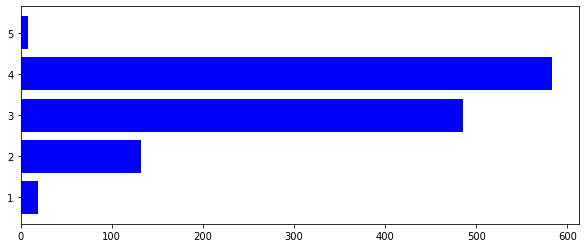

In [ ]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(Average_ratings['rating'].round(),Average_ratings['Total Ratings'],color='b')
plt.show()

#a bar graph describing number of reviews for first 25 movies

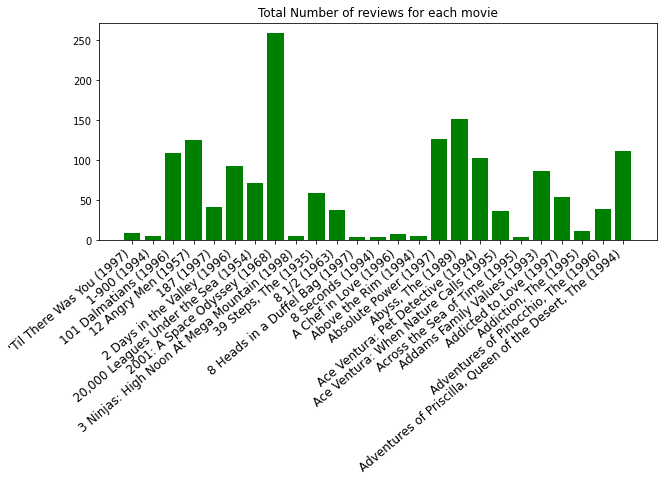

In [ ]:
#a bar graph descibibg number of reviews for first 25 movies
plt.figure(figsize =(10, 4))
ax=plt.subplot()
ax.bar(Average_ratings.head(25).index,Average_ratings['Total Ratings'].head(25),color='g')
ax.set_xticklabels(Average_ratings.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

## Calculate mean rating of all movies and check the popular high rating movies

In [ ]:
# Calculate mean rating of all movies and check the popular high rating movies
merge1.groupby('movie_title')['rating'].mean().sort_values(ascending=False).head()

movie_title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

## Another way of building the recommender system is
## by calculating the correlation between the movies

In [ ]:
movie_user =merge1.pivot_table(index='user_id',columns='movie_title',values='rating')

*The above code will create a table where the rows are userIds and the columns represent the movies. The values of the matrix represent the rating for each movie by each user.*

In [ ]:
movie_user.head(10)

movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",8 1/2 (1963),8 Heads in a Duffel Bag (1997),8 Seconds (1994),A Chef in Love (1996),Above the Rim (1994),Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),Addams Family Values (1993),Addicted to Love (1997),"Addiction, The (1995)","Adventures of Pinocchio, The (1996)","Adventures of Priscilla, Queen of the Desert, The (1994)","Adventures of Robin Hood, The (1938)","Affair to Remember, An (1957)","African Queen, The (1951)",Afterglow (1997),"Age of Innocence, The (1993)",Aiqing wansui (1994),Air Bud (1997),Air Force One (1997),"Air Up There, The (1994)",Airheads (1994),Akira (1988),Aladdin (1992),Aladdin and the King of Thieves (1996),Alaska (1996),Albino Alligator (1996),...,"Whole Wide World, The (1996)",Widows' Peak (1994),"Wife, The (1995)",Wild America (1997),Wild Bill (1995),"Wild Bunch, The (1969)",Wild Reeds (1994),Wild Things (1998),William Shakespeare's Romeo and Juliet (1996),Willy Wonka and the Chocolate Factory (1971),Window to Paris (1994),Wings of Courage (1995),Wings of Desire (1987),"Wings of the Dove, The (1997)",Winnie the Pooh and the Blustery Day (1968),"Winter Guest, The (1997)",Wishmaster (1997),With Honors (1994),Withnail and I (1987),Witness (1985),"Wizard of Oz, The (1939)",Wolf (1994),"Woman in Question, The (1950)","Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wooden Man's Bride, The (Wu Kui) (1994)","World of Apu, The (Apur Sansar) (1959)","Wrong Trousers, The (1993)",Wyatt Earp (1994),Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Now we need to select a movie to test our recommender system. Choose any movie title from the data. Here, I chose Toy Story (1995).

To find the correlation value for the movie with all other movies in the data we will pass all the ratings of the picked movie to the corrwith method of the Pandas Dataframe. The method computes the pairwise correlation between rows or columns of a DataFrame with rows or columns of Series or DataFrame. 

In [ ]:
correlations = movie_user.corrwith(movie_user['Toy Story (1995)'])
correlations.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movie_title
'Til There Was You (1997)    0.534522
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.232118
12 Angry Men (1957)          0.334943
187 (1997)                   0.651857
dtype: float64

In [ ]:
correlations = movie_user.corrwith(movie_user['Toy Story (1995)'])
correlations.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


movie_title
'Til There Was You (1997)    0.534522
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.232118
12 Angry Men (1957)          0.334943
187 (1997)                   0.651857
dtype: float64

Now we will remove all the empty values and merge the total ratings to the correlation table.

In [ ]:
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(Average_ratings['Total Ratings'])
recommendation.head()

,Correlation,Total Ratings
movie_title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93


# Testing The Recommendation System

Let’s filter all the movies with a correlation value to Toy Story (1995) and with at least 100 ratings.

In [ ]:
recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()

Let’s also merge the movies dataset for verifying the recommendations.

# Output

In [ ]:
recc = recc.merge(movies,on='movie_title', how='left')
recc.head(10)

,movie_title,Correlation,Total Ratings,movie_id
0,Toy Story (1995),1.000000,452,1
1,"Craft, The (1996)",0.549100,104,928
2,Down Periscope (1996),0.457995,101,926
3,Miracle on 34th Street (1994),0.456291,101,378
4,G.I. Jane (1997),0.454756,175,326
5,Amistad (1997),0.449915,124,750
6,Beauty and the Beast (1991),0.442960,202,588
7,"Mask, The (1994)",0.432855,129,72
8,Cinderella (1950),0.428372,129,418
9,That Thing You Do! (1996),0.427936,176,845


Reference links:
1. https://www.geeksforgeeks.org/python-implementation-of-movie-recommender-system/
2. https://www.mygreatlearning.com/blog/masterclass-on-movie-recommendation-system/
3. https://analyticsindiamag.com/how-to-build-your-first-recommender-system-using-python-movielens-dataset/